<a href="https://colab.research.google.com/github/ehsankarami1358/ehsan/blob/main/Naive_Bayse01_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
df=sns.load_dataset('titanic')

In [58]:
df.shape

(891, 15)

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: xlabel='sex', ylabel='survived'>

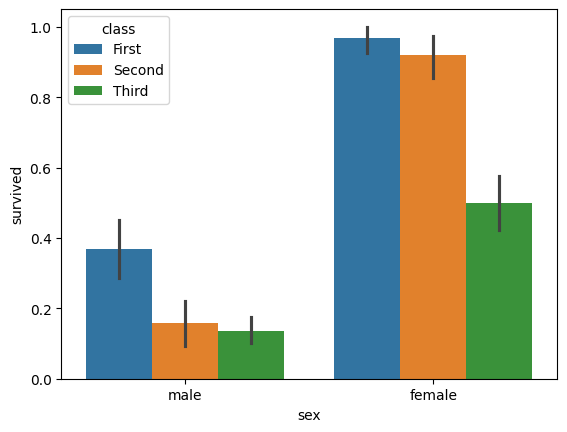

In [63]:
sns.barplot(x='sex',y='survived',data=df,hue='class')

<Axes: xlabel='embark_town', ylabel='survived'>

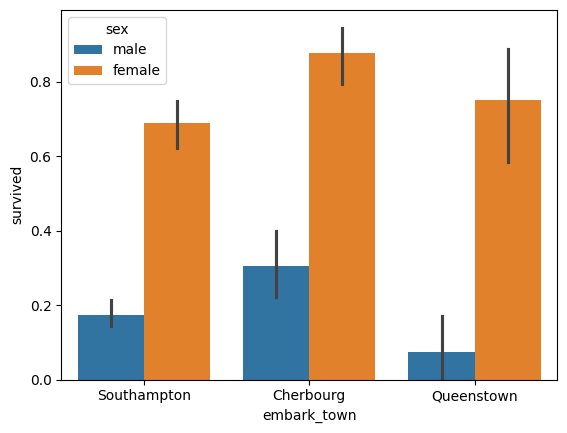

In [64]:
sns.barplot(x='embark_town',y='survived',data=df,hue='sex')

In [65]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [66]:
df['age']=df['age'].fillna(df['age'].mean())

In [67]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [68]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [69]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [70]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [71]:
df.drop(['class','who','adult_male','alive','deck'],axis=1,inplace=True)


In [72]:
df.drop(['embarked'],axis=1,inplace=True)

In [73]:
df.shape

(891, 9)

In [74]:
df['sex'].map({'male':0,'female':1})

,sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [75]:
df['embark_town'].map({'Southampton':0,'Cherbourg':1,'Queenstown':2})

,embark_town
0,0
1,1
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,1


In [77]:
df=pd.get_dummies(df)

In [78]:
df

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.000000,1,0,7.2500,False,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,False,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,False,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,True,False,False,True
887,1,1,19.000000,0,0,30.0000,True,True,False,False,False,True
888,0,3,29.699118,1,2,23.4500,False,True,False,False,False,True
889,1,1,26.000000,0,0,30.0000,True,False,True,True,False,False


In [79]:
df=df.drop(['sex_female','embark_town_Queenstown'],axis=1)

In [82]:
label=df.survived
data=df.drop(['survived'],axis=1)

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=0.25,random_state=42)

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid={'var_smoothing':np.logspace(0,-9,num=100)}

In [101]:
gnb=GaussianNB()
clf=GridSearchCV(estimator=gnb,param_grid=param_grid,cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [105]:
print(clf.best_params_)

{'var_smoothing': 2.848035868435799e-06}


In [104]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7949101796407185
0.7847533632286996


In [91]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7949101796407185
0.7847533632286996


In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.781437125748503
0.7040358744394619
